# Clustering:

In this section, we will practice clustering and see what determines clustering quality, what methods are best for gene expressiond ata and how to go about comparing various methods and their performance. We hope that these exercises expand on your understanding of various clustering methods and their applications.

To do this, we will:
1. Understand different methods fo clusteing like K-means, hierarchical and spectral
2. Learn to perform clusering using SciKit and SciPy packages
3. Understand clustering performance and noise
4. Plot clustering results on a PCA scatterplot

**References:**

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster

https://docs.scipy.org/doc/scipy/reference/reference/cluster.html

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

#load datasets
df_all = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/CellLines_ExprData.txt',sep='\t',header=(0)) 
df_15 = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/CellLines_15Genes_marked.txt',sep='\t',header=(0)) 

labels_list = df_all.loc[[0]] 

#Make a list of sample names
sample_names = df_all.loc[0] 
sample_names = list(df_all)[1:] 

#Make unique list of labels
labels = np.unique(labels_list) 

#delete "Group" label 
labels = np.delete(labels, np.where(labels == 'Group')) 

#Remove row "Group" at index 0 from data
data_all = df_all.drop([0]) 
data_15 = df_15.drop([0]) 

#Remove id from axis
data_all = data_all.drop(['id'], axis=1) 
data_all = data_all.transpose() 

data_15 = data_15.drop(['id'], axis=1) 
data_15 = data_15.transpose() 

#Get list of all labels
flabels = labels_list.loc[0,:].values[1:] 

In [ ]:
df_all.shape

(6917, 53)

Import clustering packages and fit the data. First, we will use all of the data, which contains 

In [ ]:
# import SciKit clustering methods: K-means, hierarchical and Birch
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch

#data selection
data=data_all

# define and fit the model
kmeans_m = KMeans(n_clusters=5).fit(data)
hclust_m = AgglomerativeClustering(linkage='ward', n_clusters=5).fit(data)
birch_m = Birch(n_clusters=5).fit(data)

Explore clustering results compared to original labels by creating a single dataframe with all of the result lables aligned

In [ ]:
#comapre cluster labels for all methods
d = {'Samples':sample_names, 'Labels':flabels, 'Kmeans':kmeans_m.labels_, 'Hclust':hclust_m.labels_, 'Birch':birch_m.labels_}
df = pd.DataFrame(d)

print(df)

        Samples       Labels  Kmeans  Hclust  Birch
0         184A1  Normal-like       0       0      0
1         184B5  Normal-like       2       0      0
2         21MT1        Basal       0       0      0
3          21NT        Basal       0       0      0
4          21PT        Basal       0       0      0
5        600MPE      Luminal       1       1      1
6         AU565      Luminal       3       2      2
7         BT474      Luminal       1       1      1
8         BT483      Luminal       1       1      1
9         BT549  Claudin-low       4       3      3
10        CAMA1      Luminal       1       1      1
11      EFM192A      Luminal       3       2      2
12      EFM192B      Luminal       3       2      2
13      EFM192C      Luminal       3       2      2
14      HCC1143        Basal       2       0      0
15      HCC1395  Claudin-low       4       3      3
16      HCC1419      Luminal       1       1      1
17      HCC1428      Luminal       1       1      1
18      HCC1

# Confusion Matrix

To summarize the results, we can create cross-tabulation of results, comparing clustering assignment with number of samples in known categories

this shows "confusion" - or how accurately a clustering method can assign samples to clusters. This will obviously only work when we know the expected clusters or labels for each cluster.

In [ ]:
#create cross tabulation for K-means
pd.crosstab(df.Labels, df.Kmeans, margins=True)


Kmeans,0,1,2,3,4,All
Labels,,,,,,
Basal,6,0,8,0,0,14
Claudin-low,0,0,0,0,6,6
Luminal,0,14,1,12,0,27
Normal-like,4,0,1,0,0,5
All,10,14,10,12,6,52


In [ ]:
pd.crosstab(df.Labels, df.Kmeans, margins=True, normalize = "index").round(2)*100

Kmeans,0,1,2,3,4
Labels,,,,,
Basal,43.0,0.0,57.0,0.0,0.0
Claudin-low,0.0,0.0,0.0,0.0,100.0
Luminal,0.0,52.0,4.0,44.0,0.0
Normal-like,80.0,0.0,20.0,0.0,0.0
All,19.0,27.0,19.0,23.0,12.0


In [ ]:
#create cross tabulation for Hierarchical
pd.crosstab(df.Labels, df.Hclust, margins=True)

Hclust,0,1,2,3,4,All
Labels,,,,,,
Basal,14,0,0,0,0,14
Claudin-low,0,0,0,6,0,6
Luminal,0,17,9,0,1,27
Normal-like,5,0,0,0,0,5
All,19,17,9,6,1,52


In [ ]:
df1 = pd.crosstab(df.Labels, df.Kmeans, margins=True)
df2 = pd.crosstab(df.Labels, df.Hclust, margins=True)

Text(0.5, 1.0, 'Hierarchical Clustering Cluster Prediction')

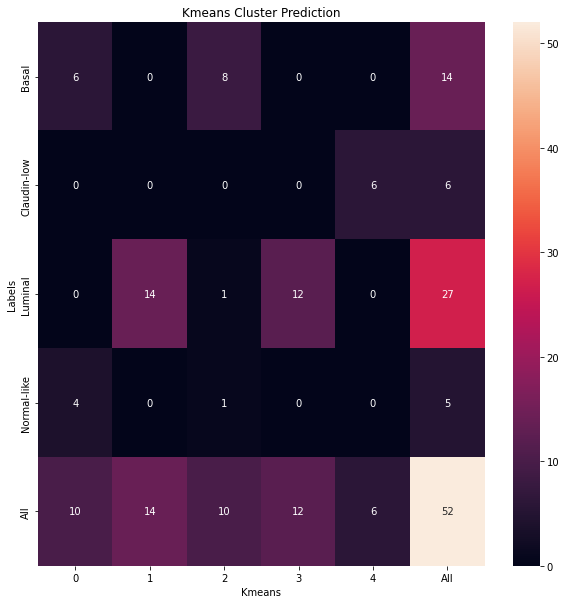

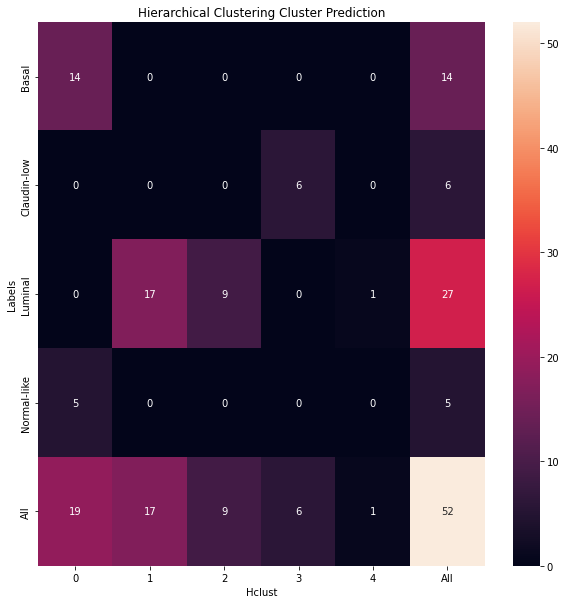

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(df1, annot=True)
plt.title("Kmeans Cluster Prediction", fontsize =12)

plt.figure(figsize=(10, 10))
sns.heatmap(df2, annot=True)
plt.title("Hierarchical Clustering Cluster Prediction", fontsize =12)


# Question:

*   Which sample type is hard to cluster?
*   Which cluster number is divided between known classes?



# Exercise:
prepare a visual comparison between 2 clustering methods of your choice



---



# K-Means: Inertia
Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases. To find the optimal K for a dataset, use the Elbow method; find the point where the decrease in inertia begins to slow. K=3 is the “elbow” of this graph.

371333.39672714286


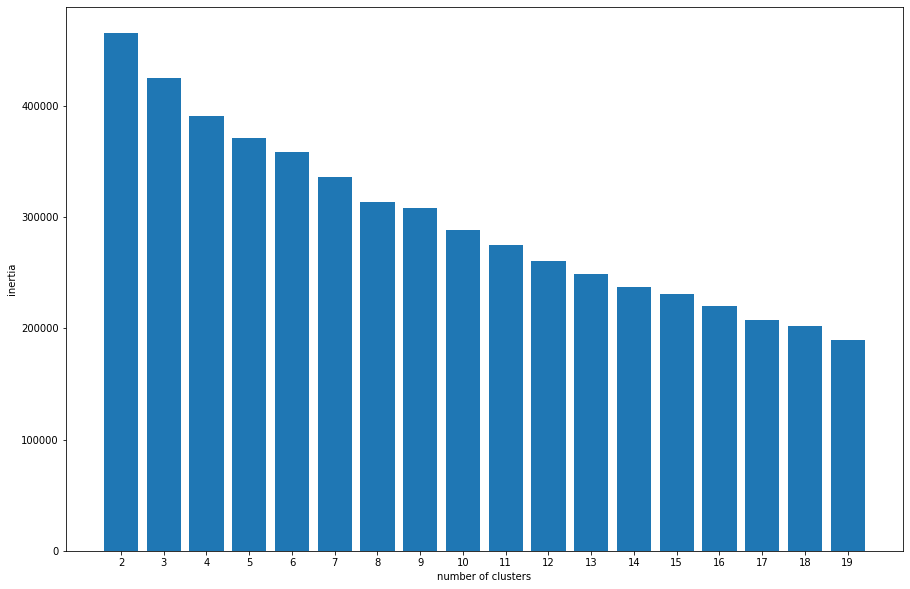

In [ ]:
#K-means evaluation inertia
print(kmeans_m.inertia_)

#check param
df1 = pd.DataFrame()

#create a dataframe with noise and number of components
for i in range (2,20):
  kmeans_m = KMeans(n_clusters=i).fit(data)
  df1 = df1.append({'clust':i,'inertia': kmeans_m.inertia_}, ignore_index=True)

plt.figure(figsize=(15, 10))
plt.bar(df1.clust, df1.inertia)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(np.arange(min(df1.clust), max(df1.clust)+1, 1.0));

In [ ]:
#create cross tabulation for Hierarchical Clustering
pd.crosstab(df.Labels, df.Hclust)

Hclust,0,1,2,3,4
Labels,,,,,
Basal,14,0,0,0,0
Claudin-low,0,0,0,6,0
Luminal,0,17,9,0,1
Normal-like,5,0,0,0,0


# Linkage Visualization for Hierarchical Clustering

linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, 

default=’ward’

Which linkage criterion to use. 
The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.



*   ‘ward’ minimizes the variance of the clusters being merged.
*   ‘average’ uses the average of the distances of each observation of the two sets.
*   ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.
*   ‘single’ uses the minimum of the distances between all observations of the two sets.

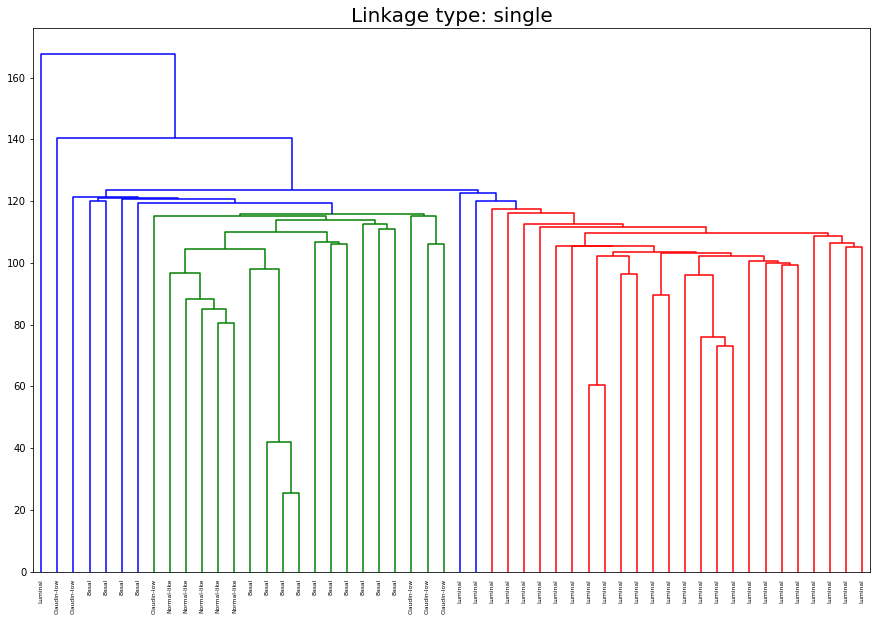

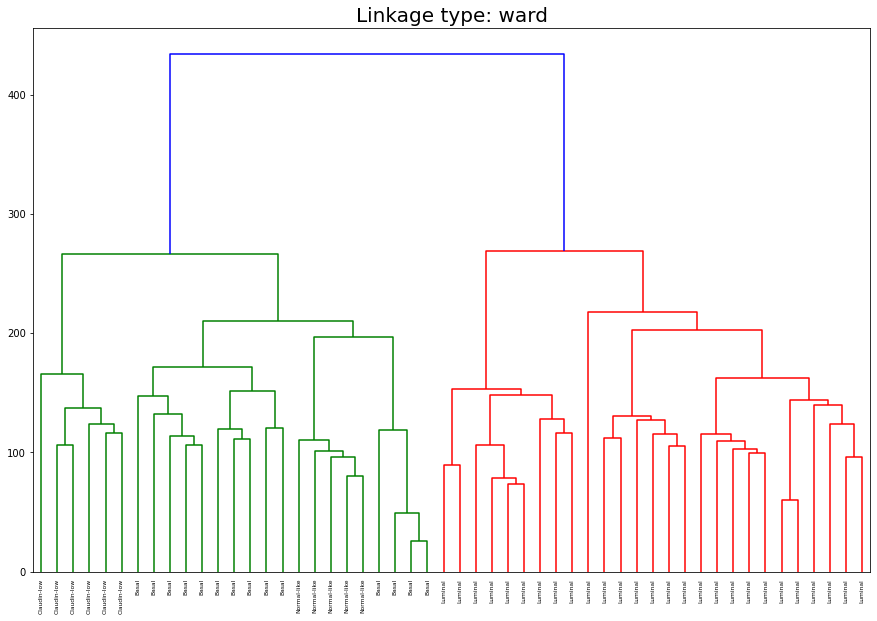

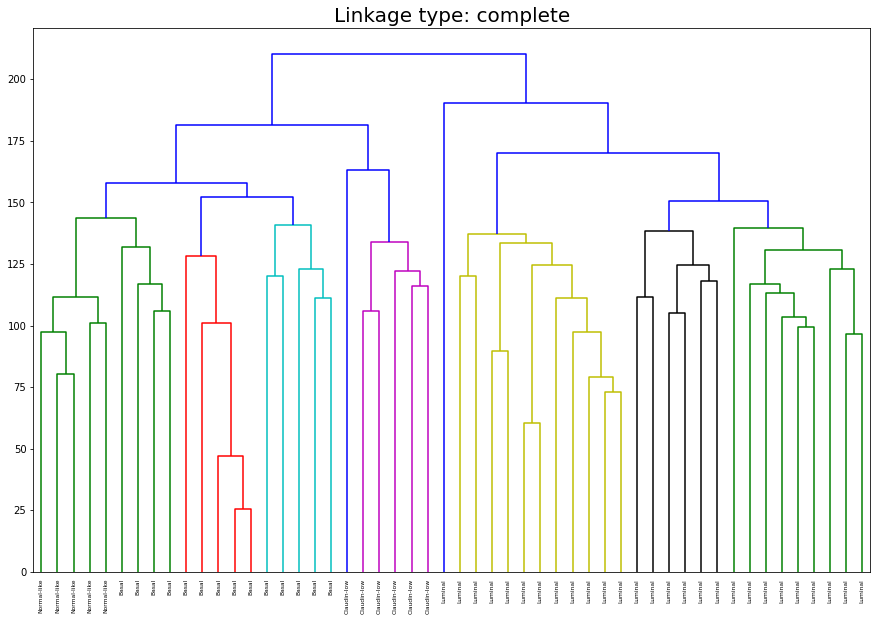

In [ ]:
# Compare Hierarchical clustering results

from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# Plot clustering results
for linkageT in enumerate(["single", "ward", "complete"]):
    model = AgglomerativeClustering(linkage=linkageT)
    Z = hierarchy.linkage(data, linkageT[1])
    name = linkageT[1]
    plt.figure(figsize=(15, 10))
    plt.title(f'Linkage type: '+ name, fontsize = 20)
    dn = hierarchy.dendrogram(Z, labels = flabels)


# The silhouette value
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters. The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

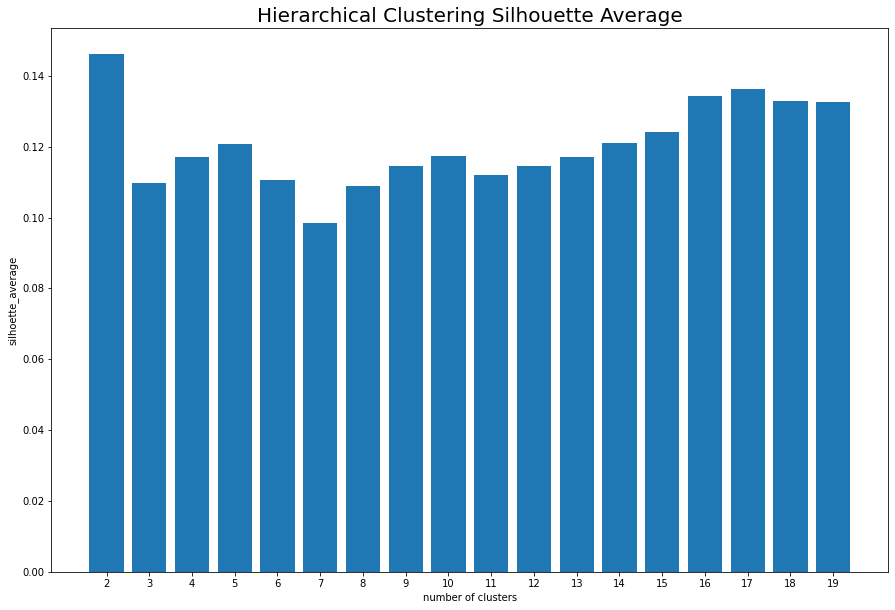

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

df_scores_hc = pd.DataFrame()

for i in range (2,20):
  hclust_m = AgglomerativeClustering(linkage='ward', n_clusters=i).fit(data)
  cluster_labels = hclust_m.fit_predict(data)
  silhouette_avg = silhouette_score(data, cluster_labels)
  #print("For %s clusters" %(i), "the average silhouette_score is:", silhouette_avg)
  df_scores_hc = df_scores_hc.append({'clust':i,'silhouette_avg': silhouette_avg}, ignore_index=True)

plt.figure(figsize=(15, 10))
plt.bar(df_scores_hc.clust, df_scores_hc.silhouette_avg)
plt.xlabel('number of clusters')
plt.ylabel('silhoette_average')
plt.title("Hierarchical Clustering Silhouette Average", fontsize=20)
plt.xticks(np.arange(2, 20, 1.0));

For 2.0 clusters the average silhouette_score is: 0.1461819188252243


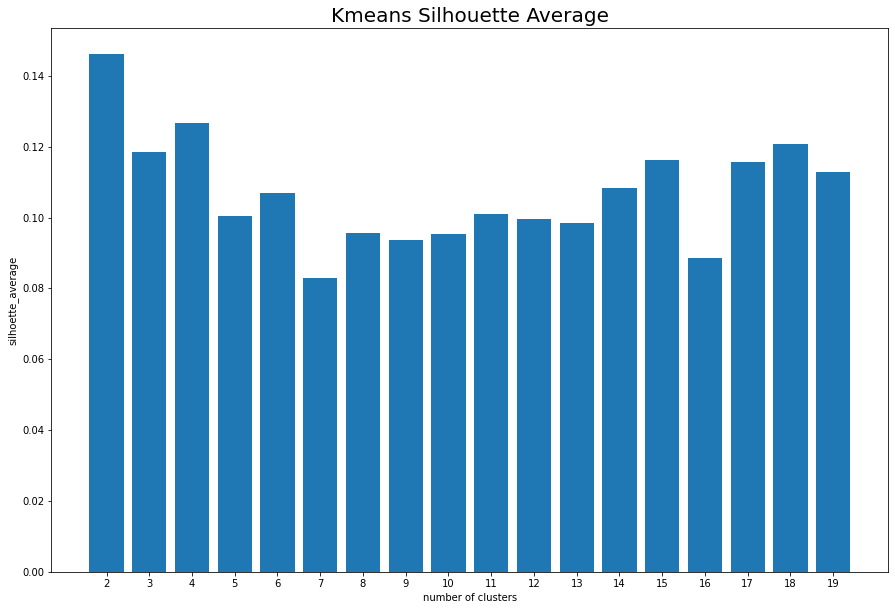

In [ ]:
#prepare a dataframe for cluster silhouette values
df_scores_kmeans = pd.DataFrame()

for i in range (2,20):
  kmeans_m = KMeans(n_clusters=i).fit(data)
  cluster_labels = kmeans_m.fit_predict(data)
  silhouette_avg = silhouette_score(data, cluster_labels)
  df_scores_kmeans = df_scores_kmeans.append({'clust':i,'silhouette_avg': silhouette_avg}, ignore_index=True)


#find the top value of silhouette score and associated cluster number
max_sil_value = df_scores_kmeans.silhouette_avg.max()
max_sil_clust = df_scores_kmeans.iloc[df_scores_kmeans.silhouette_avg.argmax(), 0]
print("For %s clusters" %(max_sil_clust), "the average silhouette_score is:", max(df_scores_kmeans.silhouette_avg))

#plot barplot for data
plt.figure(figsize=(15, 10))
plt.bar(df_scores_kmeans.clust, df_scores_kmeans.silhouette_avg)
plt.xlabel('number of clusters')
plt.ylabel('silhoette_average')
plt.title("Kmeans Silhouette Average", fontsize=20)
plt.xticks(np.arange(2, 20, 1.0));

In [ ]:
#cross tab for Birch clustering
df = df.sort_values(by=['Birch'])
pd.crosstab(df.Labels, df.Birch)

Birch,0,1,2,3,4
Labels,,,,,
Basal,14,0,0,0,0
Claudin-low,0,0,0,6,0
Luminal,0,17,9,0,1
Normal-like,5,0,0,0,0


# Exercise: 

create a heatmap for cluster results for Birch clustering

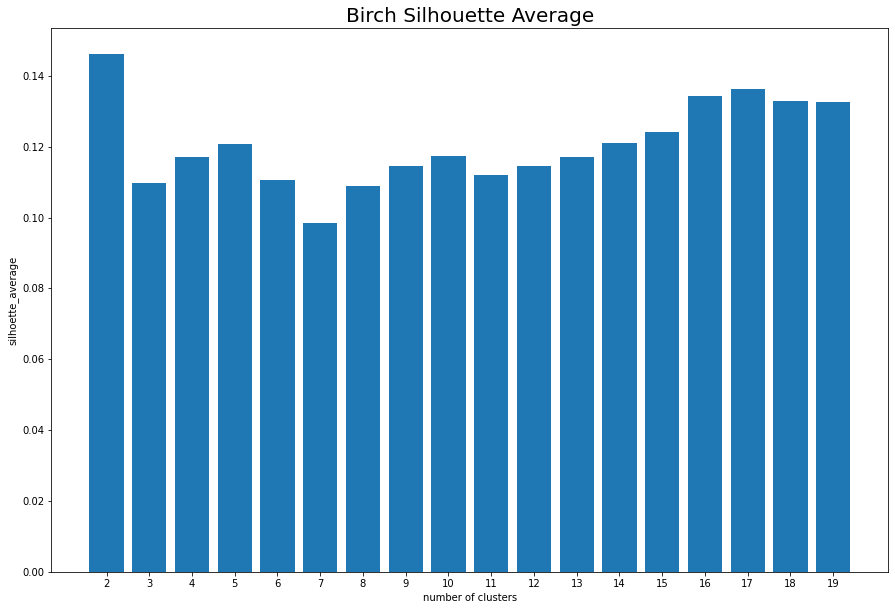

In [ ]:
df_scores_birch = pd.DataFrame()

for i in range (2,20):
  birch_m = Birch(n_clusters=i).fit(data)
  cluster_labels = birch_m.fit_predict(data)
  silhouette_avg = silhouette_score(data, cluster_labels)
  df_scores_birch = df_scores_birch.append({'clust':i,'silhouette_avg': 
                                            silhouette_avg}, ignore_index=True)
plt.figure(figsize=(15, 10))
plt.bar(df_scores_birch.clust, df_scores_birch.silhouette_avg)
plt.xlabel('number of clusters')
plt.ylabel('silhoette_average')
plt.title("Birch Silhouette Average", fontsize=20)
plt.xticks(np.arange(2, 20, 1.0));

# Visual Evaluation: PCA

Another way to test the clustering quality is by visual representation in a reduced dimensionality space. For that, we can use PCA to plot the data, but taking the labels from clustering results.

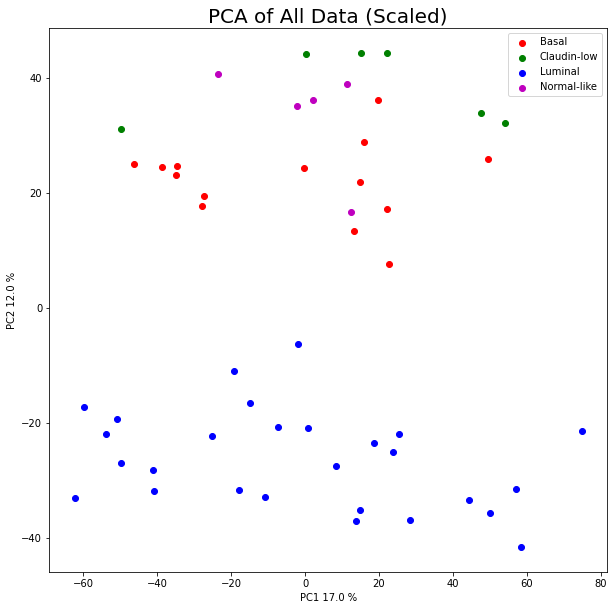

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaled = StandardScaler() 
scaled.fit(data) 
scaled_data = scaled.transform(data) 

#Run Principal Component Analysis
from sklearn.decomposition import PCA 
pca = PCA(n_components=2) 
pca.fit(scaled_data) 
xpca = pca.transform(scaled_data)

#create dataframe for PCA
df_pca = pd.DataFrame(xpca)

PC1 = 0 
PC2 = 1 

plt.figure(figsize=(10, 10))

for i in range(0, xpca.shape[0]): 
  if flabels[i] == 'Basal': 
    c1 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='r') 
    #plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 
  elif flabels[i] == 'Claudin-low': 
    c2 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='g') 
    #plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 
  elif flabels[i] == 'Luminal': 
    c3 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='b') 
    #plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 
  elif flabels[i] == 'Normal-like': 
    c4 = plt.scatter(xpca[i,PC1],xpca[i,PC2], c='m') 
    #plt.text(xpca[i,PC1],xpca[i,PC2], sample_names[i]) 

#Add labels to PCA scatterplot:
plt.legend([c1, c2, c3, c4],['Basal', 'Claudin-low', 'Luminal', 'Normal-like']) 
plt.xlabel(f'PC1 {round(pca.explained_variance_ratio_[0],2)*100} %') 
plt.ylabel(f'PC2 {round(pca.explained_variance_ratio_[1],2)*100} %') 
plt.title("PCA of All Data (Scaled)", fontsize=20)
plt.show() 

In the next few pieces of code, you can try different numbers of expected clusters and explore your data to understand how the methods cluster data


In [ ]:
# define and fit the model
n_clust = 3


kmeans_m = KMeans(n_clusters=n_clust).fit(data)
hclust_m = AgglomerativeClustering(linkage='ward', n_clusters=n_clust).fit(data)
birch_m = Birch(n_clusters=n_clust).fit(data)

Plot data on PCA to evaluate:

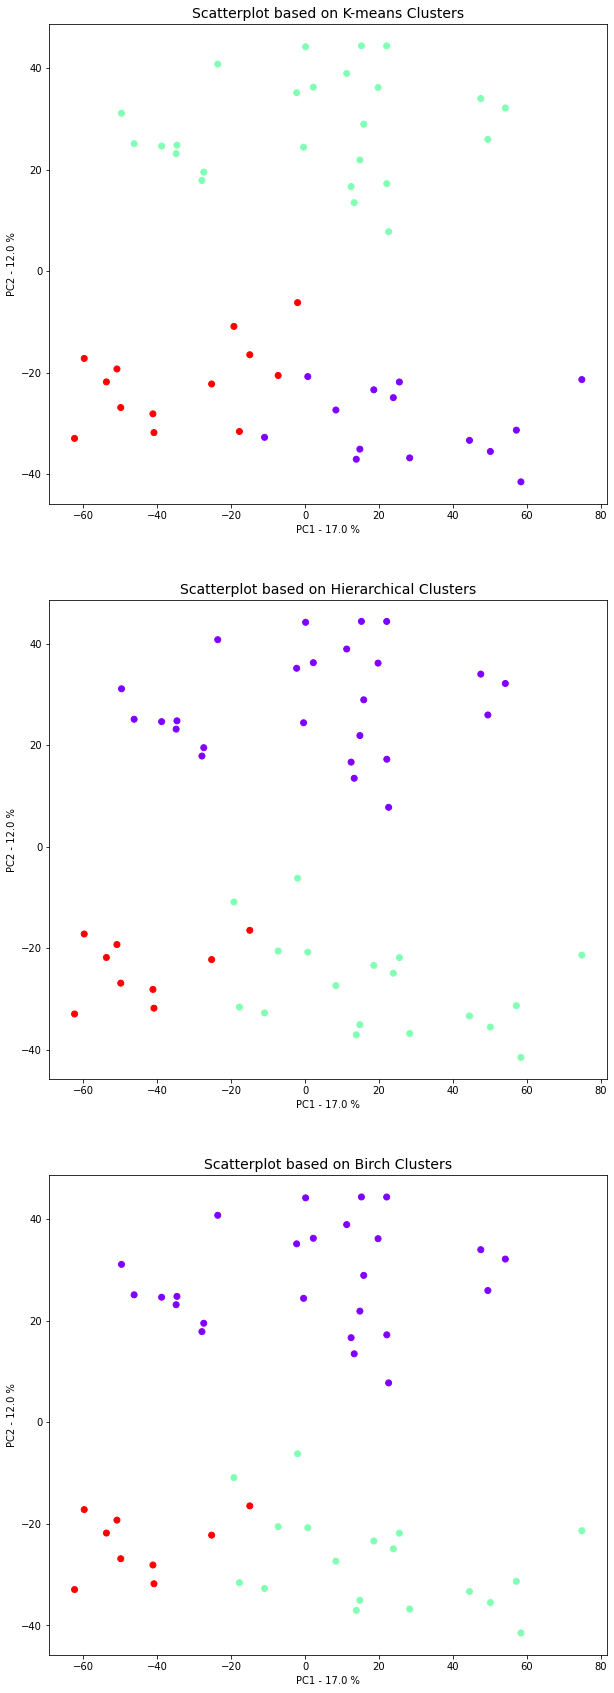

In [ ]:
fig, ax = plt.subplots(3, figsize=(10, 30))

#Plot scatterplot for K-means Clustering
ax[0].scatter(df_pca[0], df_pca[1], c = kmeans_m.labels_, cmap ='rainbow')
ax[0].set_title("Scatterplot based on K-means Clusters", fontsize=14)
ax[0].set_xlabel(f'PC1 - {round(pca.explained_variance_ratio_[0],2)*100} %') 
ax[0].set_ylabel(f'PC2 - {round(pca.explained_variance_ratio_[1],2)*100} %') 

#Plot scatterplot for Hierarchical Clustering
ax[1].scatter(df_pca[0], df_pca[1], c = hclust_m.labels_, cmap ='rainbow')
ax[1].set_title("Scatterplot based on Hierarchical Clusters", fontsize=14)
ax[1].set_xlabel(f'PC1 - {round(pca.explained_variance_ratio_[0],2)*100} %') 
ax[1].set_ylabel(f'PC2 - {round(pca.explained_variance_ratio_[1],2)*100} %') 

#Plot scatterplot for Birch Clustering
ax[2].scatter(df_pca[0], df_pca[1], c = birch_m.labels_, cmap ='rainbow')
ax[2].set_title("Scatterplot based on Birch Clusters", fontsize=14)
ax[2].set_xlabel(f'PC1 - {round(pca.explained_variance_ratio_[0],2)*100} %') 
ax[2].set_ylabel(f'PC2 - {round(pca.explained_variance_ratio_[1],2)*100} %') 

plt.show()

Prepare the 3D scatterplot object

In [ ]:
pca3D = PCA(n_components=3) 
pca3D.fit(scaled_data) 
xpca3D = pca3D.transform(scaled_data)

#Finally we will create our PCA figure using matplotlib, label the plot and 
#show it using a Scatter plot, for loop through PCA data and check full labels 
#list for group to set marker

PC1 = 0 
PC2 = 1 
PC3 = 3

#create dataframe for PCA
df_pca3D = pd.DataFrame(xpca3D)

#Add column names
df_pca3D.columns = ['P1', 'P2', 'P3']

Change the plot below to compare hierarchical and k-means clustering results

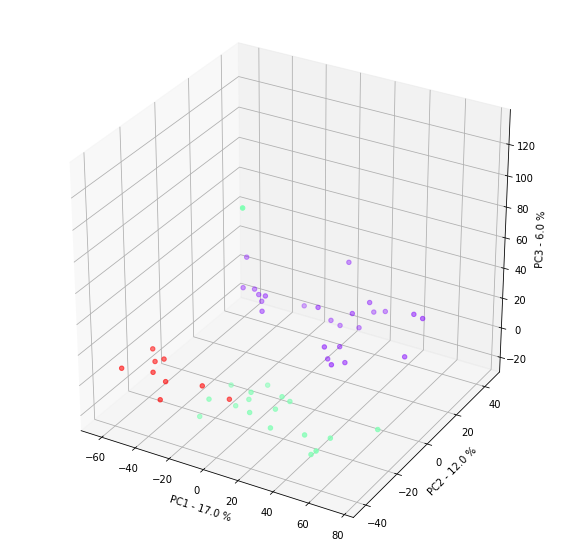

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection = '3d')

x = df_pca3D['P1']
y = df_pca3D['P2']
z = df_pca3D['P3']

ax.scatter(x, y, z, c = hclust_m.labels_, cmap ='rainbow')
ax.set_xlabel(f'PC1 - {round(pca3D.explained_variance_ratio_[0],2)*100} %')
ax.set_ylabel(f'PC2 - {round(pca3D.explained_variance_ratio_[1],2)*100} %')
ax.set_zlabel(f'PC3 - {round(pca3D.explained_variance_ratio_[2],2)*100} %')

plt.show()

We can spin our PCA to explore data in 3 dimensions

In [ ]:
from IPython.display import HTML
from matplotlib import animation

def animate(frame):
  ax.view_init(30, frame/4)
  plt.pause(.001)
  return fig

anim = animation.FuncAnimation(fig, animate, frames=200, interval=50)
HTML(anim.to_html5_video())

# Question:
which sample is an outlier?

# Exercise: 
Apply the evaluation techniques to identify the best number of clusters and the best performing method for the 15 gene dataset. For the best dataset, make a plot that you think illustrates best your decision.

In [ ]:
#data selection
data=data_15

labels_list = df_15.loc[[0]] 

#Make a list of sample names
sample_names = df_15.loc[0] 
sample_names = list(df_15)[1:] 

#Make unique list of labels
labels = np.unique(labels_list) 

#delete "Group" label 
labels = np.delete(labels, np.where(labels == 'Group')) 

#Get list of all labels
flabels = labels_list.loc[0,:].values[1:] 
flabels1 = pd.Categorical(flabels)

# define and fit the model
kmeans_m = KMeans(n_clusters=4).fit(data)
hclust_m = AgglomerativeClustering(linkage='ward', n_clusters=4).fit(data)
birch_m = Birch(n_clusters=4).fit(data)

from sklearn.cluster import SpectralClustering
sc_m = SpectralClustering(4, n_init=100).fit(data)

#comapre cluster labels for all methods
d = {'Samples':sample_names, 'Labels':flabels, 'Kmeans':kmeans_m.labels_, 
     'Hclust':hclust_m.labels_, 'Birch':birch_m.labels_, 'Spec':sc_m.labels_}
df = pd.DataFrame(d)

df

,Samples,Labels,Kmeans,Hclust,Birch,Spec
0,184A1,Normal-like,3,3,3,2
1,184B5,Normal-like,3,3,3,2
2,21MT1,Basal,0,1,1,0
3,21NT,Basal,0,1,1,0
4,21PT,Basal,0,1,1,0
5,600MPE,Luminal,1,0,0,3
6,AU565,Luminal,1,0,0,3
7,BT474,Luminal,1,0,0,3
8,BT483,Luminal,1,0,0,3
9,BT549,Claudin-low,2,2,2,1


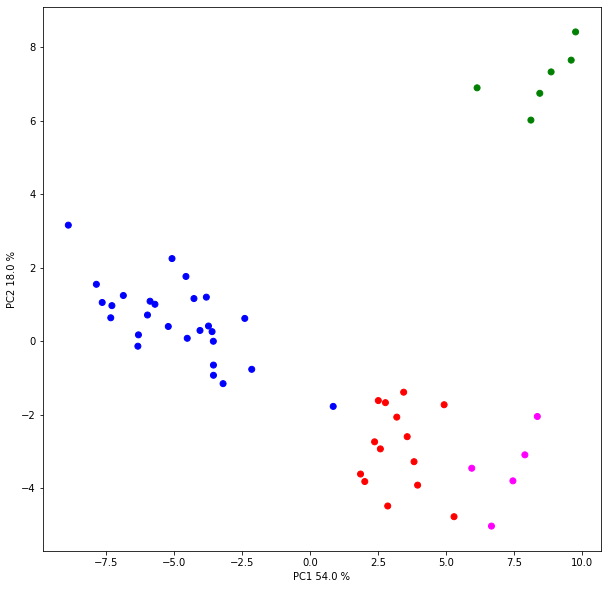

In [ ]:
pca1 = PCA(n_components=2) 
pca1.fit(data) 
xpca1 = pca1.transform(data)
df_pca1 = pd.DataFrame(xpca1)

PC1 = 0 
PC2 = 1 

colors = {'Basal':'red', 'Claudin-low':'green', 'Luminal':'blue', 
          'Normal-like':'magenta'}

plt.figure(figsize=(10, 10)) 
plt.scatter(df_pca1[0], df_pca1[1],c = flabels1.map(colors), cmap ='rainbow')
plt.xlabel(f'PC1 {round(pca1.explained_variance_ratio_[0],2)*100} %') 
plt.ylabel(f'PC2 {round(pca1.explained_variance_ratio_[1],2)*100} %') 
plt.show() 

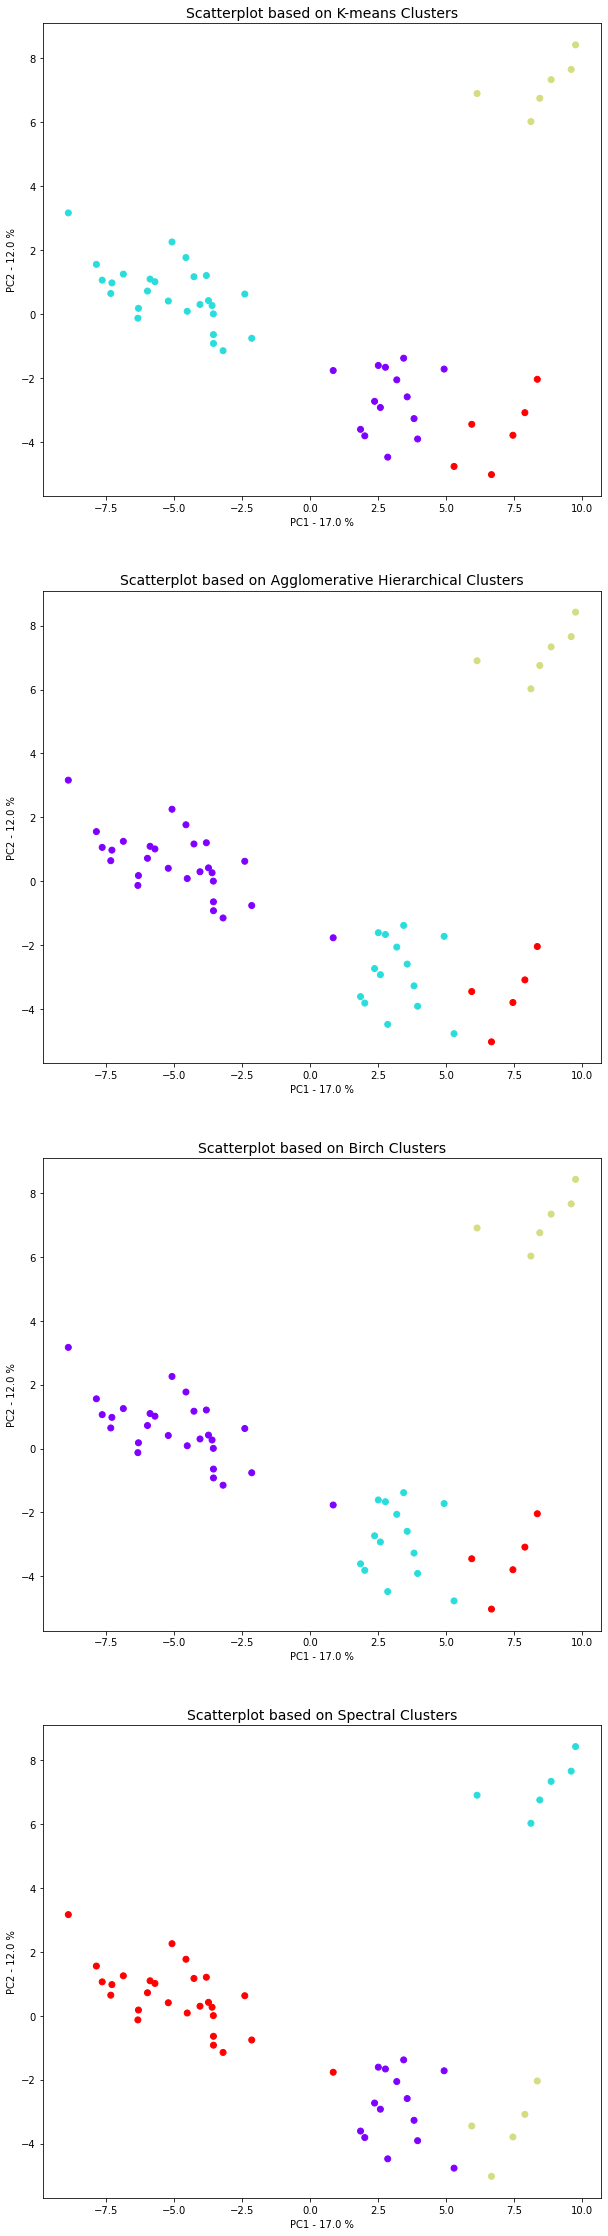

In [ ]:
fig, ax = plt.subplots(4, figsize=(10, 40))

#Plot scatterplot for K-means Clustering
ax[0].scatter(df_pca1[0], df_pca1[1], c = kmeans_m.labels_, cmap ='rainbow') # provide labels based on the predicted labels
ax[0].set_title("Scatterplot based on K-means Clusters", fontsize=14)
ax[0].set_xlabel(f'PC1 - {round(pca.explained_variance_ratio_[0],2)*100} %') 
ax[0].set_ylabel(f'PC2 - {round(pca.explained_variance_ratio_[1],2)*100} %') 

#Plot scatterplot for Hierarchical Clustering
ax[1].scatter(df_pca1[0], df_pca1[1], c = hclust_m.labels_, cmap ='rainbow') # provide labels based on the predicted labels
ax[1].set_title("Scatterplot based on Agglomerative Hierarchical Clusters", fontsize=14)
ax[1].set_xlabel(f'PC1 - {round(pca.explained_variance_ratio_[0],2)*100} %') 
ax[1].set_ylabel(f'PC2 - {round(pca.explained_variance_ratio_[1],2)*100} %') 

#Plot scatterplot for Birch Clustering
ax[2].scatter(df_pca1[0], df_pca1[1], c = birch_m.labels_, cmap ='rainbow') # provide labels based on the predicted labels
ax[2].set_title("Scatterplot based on Birch Clusters", fontsize=14)
ax[2].set_xlabel(f'PC1 - {round(pca.explained_variance_ratio_[0],2)*100} %') 
ax[2].set_ylabel(f'PC2 - {round(pca.explained_variance_ratio_[1],2)*100} %') 

#Plot scatterplot for Spectral Clustering
ax[3].scatter(df_pca1[0], df_pca1[1], c = sc_m.labels_, cmap ='rainbow') # provide labels based on the predicted labels
ax[3].set_title("Scatterplot based on Spectral Clusters", fontsize=14)
ax[3].set_xlabel(f'PC1 - {round(pca.explained_variance_ratio_[0],2)*100} %') 
ax[3].set_ylabel(f'PC2 - {round(pca.explained_variance_ratio_[1],2)*100} %') 

plt.show()

# Reflection:
What are some of the ways you can evaluate clustering outputs? (and: compare with known labels, evaluate cluster performance, check PCA)
What are the considerations to choose settings for all methods? (ans: silhouette average)
What are parameters you can check for in Hierarchical clustering and how? (ans: linkage, number of clusters, using silhouette method and plotting the dendrogram)
What are some ways you can evaluate K-means clustering (ans: inertia)

# Assignment:
perform clustering on genes instead of samples. Compare DBSCAN, Spectral and Hierarchical clustering.